In [6]:
from google.colab import drive
drive.mount('/content/gdrive')
folder = '/content/gdrive/My Drive/Colab Notebooks/CNN'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


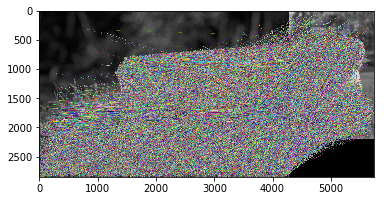

(<matplotlib.image.AxesImage at 0x7f732e763668>, None)

In [20]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread(folder + '/1.jpg',0)# queryImage
img2 = cv2.imread(folder+'/2.jpg',0) # trainImage


# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
plt.imshow(img1)
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

        
# draw_params = dict(matchColor = (0,255,0),
#                    singlePointColor = (255,0,0),
#                    matchesMask = matchesMask,
#                    flags = 0)

# img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)        
        
# cv2.drawMatchesKnn expects list of lists as matches.
#img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,flags=2)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,flags=2)

plt.imshow(img3),plt.show()

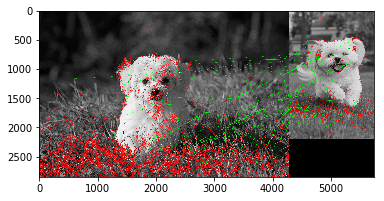

(<matplotlib.image.AxesImage at 0x7f732bcfde10>, None)

In [11]:
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.imshow(img3,),plt.show()